<br><h1 style="text-align: center; font-family: 'Cairo', sans-serif; font-weight: bold; background-color: white;">
    <span style="color: #C41E3A;">CAT</span>
    <span style="color: #003153;">Reloaded</span>
</h1>

# Project: cleanning - [candy data]
### In this notebook we will do some cleanning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Cleaning">Cleaning</a></li>
  
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> I will go through candy data 2017 , this data has :
- Internal_ID
- Q1-going_out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present


# 1- Importing packages and loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', False)
pd.set_option('display.max_rows', None)

df = pd.read_excel("candyhierarchy2017.xlsx")
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,...,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,...,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,...,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,"Reese's crispy crunchy bars, 5th avenue bars, ...",NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,...,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,

# 2- Some general properties of the data 

In [2]:
df.shape

(2460, 120)

In [3]:
df.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


In [4]:
df.describe(include=['O'])

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,...,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q7: JOY OTHER,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,"Click Coordinates (x, y)"
count,2350,2419,2376,2396,2360,1713,1726,1788,1502,1468,1454,1695,1772,1754,1778,1777,1782,1769,1708,1780,1717,1514,1749,1607,1756,1768,1731,1758,1637,1729,1763,1581,1726,1744,1763,1765,1766,1748,1787,1788,...,1643,1750,1751,1738,1707,1781,1769,1446,1746,1684,1754,1735,1559,1770,1722,1578,1767,1752,1745,1458,1543,1746,1724,1752,1754,1752,1770,1668,1671,1637,1703,1713,1755,911,717,386,1716,9,1735,1605
unique,2,4,106,128,511,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,867,685,385,2,1,2,952
top,No,Male,40,USA,California,JOY,DESPAIR,JOY,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,JOY,...,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,JOY,JOY,MEH,JOY,DESPAIR,JOY,JOY,MEH,JOY,JOY,DESPAIR,JOY,JOY,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,Almond Joy,Trump,nom nom nom!,White and gold,dress (https://survey.ubc.ca/media/assets/user...,Friday,"(77, 24)"
freq,2038,1467,92,699,132,873,1089,1559,793,857,715,670,1179,1625,1177,820,743,1325,953,1439,1040,644,761,592,1406,1433,664,1176,676,1176,703,708,742,1462,748,907,855,1069,1105,896,...,725,1085,1076,649,1480,1498,1136,706,1151,1151,829,729,605,1399,770,1140,853,783,754,763,613,754,1252,1058,1320,836,1413,1146,723,840,1455,1289,1105,10,7,2,1081,9,1091,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


In [6]:
nulls = pd.DataFrame(df.isnull().sum(), columns=['Null Count'])
nulls['Null Percentage'] = round(100 * df.isnull().sum() / len(df), 2)
nulls = nulls.sort_values('Null Count', ascending=False)
nulls

,Null Count,Null Percentage
Unnamed: 113,2451,99.63
Q12: MEDIA [Yahoo],2393,97.28
Q12: MEDIA [Daily Dish],2375,96.54
Q12: MEDIA [ESPN],2361,95.98
Q9: OTHER COMMENTS,2074,84.31
Q8: DESPAIR OTHER,1743,70.85
Q7: JOY OTHER,1549,62.97
Q12: MEDIA [Science],1098,44.63
Q6 | JoyJoy (Mit Iodine!),1026,41.71
Q6 | Maynards,1024,41.63


In [7]:
df.duplicated().any()

False

# 3- Summary
- The data is so messy and needs a lot of cleaning, we have a lot of missing values, we must change columns' names for easeness, we need to correct some types of variables, the data doesn't have any duplicated values.

<a id = Cleaning></a>
# Cleaning

### 4- Drop all the useless columns and  rows with too much NaN , 

In [8]:
df.drop(['Unnamed: 113', 'Internal ID', 'Q9: OTHER COMMENTS', 'Click Coordinates (x, y)', 'Q8: DESPAIR OTHER', 'Q7: JOY OTHER', ], axis='columns', inplace = True)

In [9]:
new_names = {'Q1: GOING OUT?': 'going_out', 'Q2: GENDER':'gender', 'Q3: AGE': 'age', \
    'Q4: COUNTRY': 'country', 'Q5: STATE, PROVINCE, COUNTY, ETC': 'state', \
    'Q10: DRESS':'dress', 'Q11: DAY':'day', 'Q12: MEDIA [Daily Dish]':'daily_dish',\
        'Q12: MEDIA [Science]':'science', 'Q12: MEDIA [ESPN]':'espn', 'Q12: MEDIA [Yahoo]':'yahoo'}
df.rename(columns=new_names, inplace=True)

In [10]:
df.head()

,going_out,gender,age,country,state,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,Q6 | Cadbury Creme Eggs,Q6 | Candy Corn,Q6 | Candy that is clearly just the stuff given out for free at restaurants,Q6 | Caramellos,"Q6 | Cash, or other forms of legal tender",Q6 | Chardonnay,Q6 | Chick-o-Sticks (we don’t know what that is),Q6 | Chiclets,Q6 | Coffee Crisp,Q6 | Creepy Religious comics/Chick Tracts,Q6 | Dental paraphenalia,Q6 | Dots,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Generic Brand Acetaminophen,Q6 | Glow sticks,Q6 | Goo Goo Clusters,Q6 | Good N' Plenty,Q6 | Gum from baseball cards,Q6 | Gummy Bears straight up,Q6 | Hard Candy,Q6 | Healthy Fruit,Q6 | Heath Bar,Q6 | Hershey's Dark Chocolate,Q6 | Hershey’s Milk Chocolate,...,Q6 | Nestle Crunch,Q6 | Now'n'Laters,Q6 | Peeps,Q6 | Pencils,Q6 | Pixy Stix,Q6 | Real Housewives of Orange County Season 9 Blue-Ray,Q6 | Reese’s Peanut Butter Cups,Q6 | Reese's Pieces,Q6 | Reggie Jackson Bar,Q6 | Rolos,Q6 | Sandwich-sized bags filled with BooBerry Crunch,Q6 | Skittles,Q6 | Smarties (American),Q6 | Smarties (Commonwealth),Q6 | Snickers,Q6 | Sourpatch Kids (i.e. abominations of nature),Q6 | Spotted Dick,Q6 | Starburst,Q6 | Sweet Tarts,Q6 | Swedish Fish,Q6 | Sweetums (a friend to diabetes),Q6 | Take 5,Q6 | Tic Tacs,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,dress,day,daily_dish,science,espn,yahoo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,JOY,JOY,...,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,MEH,MEH,JOY,JOY,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,MEH,...,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,MEH,MEH,DESPAIR,DESPAIR,DESPAIR,MEH,JOY,MEH,DESPAIR,MEH,MEH,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
4,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,...,JOY,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,JOY,MEH,JOY,NaN,JOY,JOY,DESPAIR,NaN,MEH,DESPAIR,JOY,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,NaN,1.0,NaN,NaN


### 5 - `going_out` column 

In [11]:
df['going_out'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [12]:
df['going_out'].fillna('Maybe', inplace=True)
print(df['going_out'].unique())
df['going_out'].value_counts() / df.shape[0] * 100

['Maybe' 'No' 'Yes']


going_out
No       82.845528
Yes      12.682927
Maybe     4.471545
Name: count, dtype: float64

### 6 - ` gender` column 

In [13]:
df['gender'].unique()

array([nan, 'Male', 'Female', "I'd rather not say", 'Other'], dtype=object)

In [14]:
df['gender'].fillna("Didn't say", inplace=True)
df['gender'].replace("I'd rather not say", "Didn't say", inplace=True)
df['gender'].replace("Other", "Didn't say", inplace=True) # because we only have two genders :)

print(df['gender'].unique())
df['gender'].value_counts() / df.shape[0] * 100

["Didn't say" 'Male' 'Female']


gender
Male          59.634146
Female        34.105691
Didn't say     6.260163
Name: count, dtype: float64

### 7 - ` age` column 

In [15]:
df['age'].unique()

array([nan, 44, 49, 40, 23, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45,
       25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42,
       62, 29, 39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19,
       'Old enough', 57, 60, 66, 12, 'Many', 55, 72, '?', 21, 11, 'no', 9,
       68, 20, 6, 10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88,
       39.4, 74, 102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       70.5, 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [16]:
df['age'].replace('sixty-nine', 69, inplace=True)
df['age'].replace('46 Halloweens', 46, inplace=True)
df['age'].replace('59 on the day after Halloween', 59, inplace=True)


df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'].fillna(np.nan, inplace=True)

df['age'].describe()

count    2354.000000
mean       42.635472
std        23.844984
min         1.000000
25%        34.000000
50%        41.000000
75%        50.000000
max      1000.000000
Name: age, dtype: float64

<Axes: xlabel='age'>

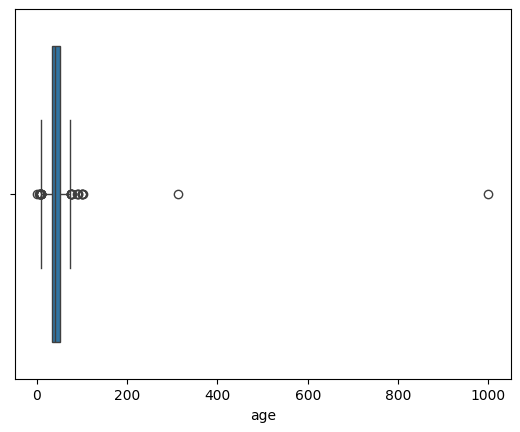

In [17]:
sns.boxplot(x=df['age'])

In [18]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df['age'] = df['age'].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

In [19]:
df['age'].isnull().sum()

133

In [20]:
gender_group = df.groupby('gender')['age'].median()
gender_group

gender
Didn't say    37.0
Female        40.0
Male          42.0
Name: age, dtype: float64

In [21]:
gender_group = df.groupby('gender')['age'].median()

for gender, median_age in gender_group.items():
    df.loc[(df['age'].isna()) & (df['gender'] == gender), 'age'] = median_age

overall_median = df['age'].median()
df['age'].fillna(overall_median, inplace=True)

df['age'] = df['age'].astype(int)

<Axes: xlabel='age'>

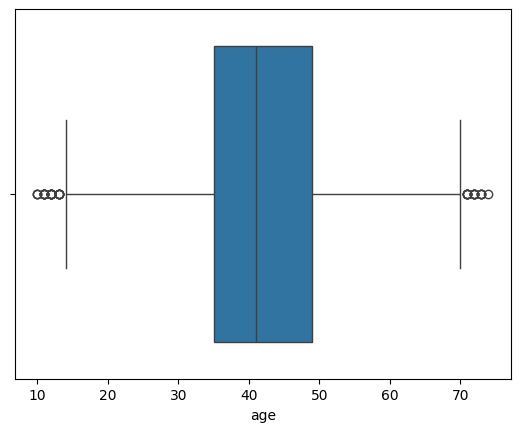

In [22]:
sns.boxplot(x = df['age'])

<Axes: xlabel='age', ylabel='Density'>

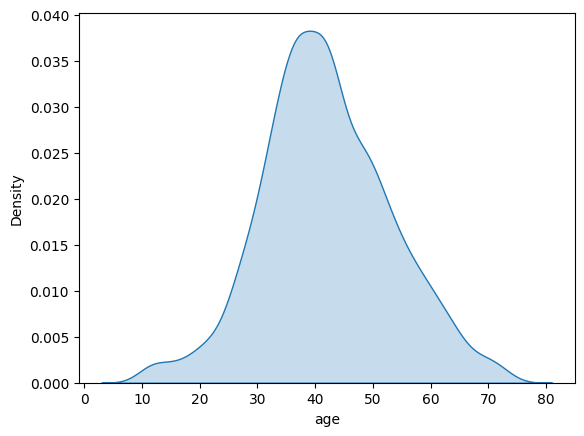

In [23]:
sns.kdeplot(df['age'], shade=True)

In [24]:
print(df['age'].isnull().sum().any())
df['age'].dtype


False


dtype('int32')

### 8 - ` country` column

In [25]:
print(df['country'].nunique())
df['country'].unique()

128


array([nan, 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', 35,
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', 46, 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', 45, 'United State', 32, 'France',
       'australia', 'A', 'Can', 'Canae', 'New York', 'Trumpistan',
       'Ireland', 'United Sates', 'Korea', 

In [26]:
from fuzzywuzzy import process

val_countries = ['usa', 'united states', 'united states of america', 'america', 'uk', 'england', 'united kingdom', \
    'japan', 'canada', 'france', 'germany', 'spain', 'australia', 'sweden', 'switzerland', 'netherlands', 'norway']

df['country'] = df['country'].str.lower()
for country in val_countries:
        matches = process.extract(country, df['country'], limit=df.shape[0])
        for sub in matches:
            if sub[1] >= 80:
                df.loc[df['country'] == sub[0], 'country'] = country

In [27]:
print(df['country'].nunique())
df['country'].unique()

56


array([nan, 'usa', 'canada', 'murica', 'america', 'uk', 'uae', 'england',
       'mexico', 'u.s.a.', 'france', 'finland', 'north carolina ',
       'netherlands', 'germany', 'europe', 'earth', 'costa rica',
       'cascadia', 'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', 'pittsburgh', 'canae', 'new york',
       'trumpistan', 'ireland', 'korea', 'california', 'japan',
       'south africa', 'iceland', 'scotland', 'denmark', 'switzerland',
       'ud', 'scotland ', 'south korea', 'new jersey', 'indonesia',
       'atlantis', 'murrika', 'alaska', 'soviet canuckistan', 'singapore',
       'china', 'taiwan', 'ireland ', 'hong kong', 'spain', 'sweden',
       'narnia', 'u s a', 'subscribe to dm4uz3 on youtube',
       "i don't know anymore", 'fear and loathing'], dtype=object)

In [28]:
true_countries = {'america': 'usa', 'murica':'usa', 'u.s.a.':'usa', 'england':'uk', 'new york': 'usa', 'north carolina': 'usa', 'cascadia':'usa', \
    'usa? hard to tell anymore..':'usa', 'pittsburgh':'usa', 'canae':'canada', 'california':'usa', 'ud':'uk', 'new jersey':'usa', 'soviet canuckistan':'canada', \
        'murrika':'usa', 'u s a':'usa', 'hong kong': 'china'}

df['country'].replace(true_countries, inplace=True)
df.value_counts('country') / df.shape[0] * 100

country
usa                               83.821138
canada                             9.268293
uk                                 0.894309
germany                            0.406504
australia                          0.284553
netherlands                        0.284553
japan                              0.203252
china                              0.162602
mexico                             0.162602
scotland                           0.162602
france                             0.121951
switzerland                        0.121951
ireland                            0.121951
sweden                             0.081301
denmark                            0.081301
spain                              0.040650
singapore                          0.040650
south africa                       0.040650
south korea                        0.040650
earth                              0.040650
subscribe to dm4uz3 on youtube     0.040650
taiwan                             0.040650
trumpistan              

In [29]:
last_countries = ['usa', 'canada', 'uk', 'germany', 'australia', 'netherlands', 'japan',\
    'china', 'mexico', 'scotland', 'france', 'switzerland', 'ireland']

df['country'] = df['country'].apply(lambda x: x if x in last_countries else 'other')
df['country'].value_counts() / df.shape[0] * 100


country
usa            83.821138
canada          9.268293
other           3.983740
uk              0.894309
germany         0.406504
netherlands     0.284553
australia       0.284553
japan           0.203252
mexico          0.162602
scotland        0.162602
china           0.162602
france          0.121951
ireland         0.121951
switzerland     0.121951
Name: count, dtype: float64

### 9 - ` state` column

In [30]:
df['state'].unique()

array([nan, 'NM', 'Virginia', 'or', 'exton pa', 'Colorado ', 'ontario',
       'Ontario', 'Wa', 'Quebec', 'NY', 'California', 'Texas', 'NEW YORK',
       'CO', 'IN', 'MN', 'aberdeenshire', 'Alberta', 'Wisconsin, 53705',
       'RI', 'NC', 'Scotland', 'minnesota', 'Michigan', 'Florida',
       'New Jersey', 'VA', 'Colorado', 'Los Angeles, California', 'CA',
       'New York ', 'Chicago, Illinois', 'Nj', 'Wisconsin', 'Minnesota ',
       'London', 'mn', 'TEXAS', 'Illinois', 'District of Columbia',
       'Washington', 'Massachusetts ', 'OR', 'Montana', 'New York',
       'massachusetts', 'Abu Dhabi', 'TX', 'Arizona', 'Dc', 'yukon',
       'Pennsylvania ', 'MD', 'Ohio', 'Alberta ', 'OXFORDSHIRE', 'DC',
       'Iowa', 'Mn', 'TN', 'BC', 'Maryland', 'MI', 'Wisconsin ', 'alaska',
       'Ny', 'Colorado, Jefferson county ', 'Louisiana', 'pa',
       'CO, Larimer County', 'Nebraska ', 'Oregon', 'UT', 'ny',
       'Pennsylvania', 'CDMX', 'north carolina', 'Tennessee ', 'Texas ',
       'Knox cou

In [31]:
df['state'].nunique()

511

In [32]:
df['state'] = df['state'].str.lower()
df['state'] = df['state'].apply(lambda x: x.split(',')[0] if isinstance(x, str) and ',' in x else x)
df['state'] = df['state'].str.strip()
df['state'] = df['state'].str.replace('county', '')
df['state'] = df['state'].str.replace('province', '')
df['state'] = df['state'].str.replace('state', '')

In [33]:
df['state'].nunique()

281

In [34]:
df['state'].unique()

array([nan, 'nm', 'virginia', 'or', 'exton pa', 'colorado', 'ontario',
       'wa', 'quebec', 'ny', 'california', 'texas', 'new york', 'co',
       'in', 'mn', 'aberdeenshire', 'alberta', 'wisconsin', 'ri', 'nc',
       'scotland', 'minnesota', 'michigan', 'florida', 'new jersey', 'va',
       'los angeles', 'ca', 'chicago', 'nj', 'london', 'illinois',
       'district of columbia', 'washington', 'massachusetts', 'montana',
       'abu dhabi', 'tx', 'arizona', 'dc', 'yukon', 'pennsylvania', 'md',
       'ohio', 'oxfordshire', 'iowa', 'tn', 'bc', 'maryland', 'mi',
       'alaska', 'louisiana', 'pa', 'nebraska', 'oregon', 'ut', 'cdmx',
       'north carolina', 'tennessee', 'knox ', 'new mexico', 'maine',
       'mo', 'ma', 'il', 'new hampshire', 'georgia', 'ne', 'oklahoma',
       'sc', 'nevada', 'vancouver',
       'oregon - but will be in washington for halloween', 'rhode island',
       'vt', 'alabama', 'ga', 'fl', 'nope', 'manitoba', 'south carolina',
       'baja california', 'santa

In [35]:
state_abbr = {
    'al': 'alabama', 'ak': 'alaska', 'az': 'arizona', 'ar': 'arkansas',
    'ca': 'california', 'co': 'colorado', 'ct': 'connecticut', 'de': 'delaware',
    'fl': 'florida', 'ga': 'georgia', 'hi': 'hawaii', 'id': 'idaho',
    'il': 'illinois', 'in': 'indiana', 'ia': 'iowa', 'ks': 'kansas',
    'ky': 'kentucky', 'la': 'louisiana', 'me': 'maine', 'md': 'maryland',
    'ma': 'massachusetts', 'mi': 'michigan', 'mn': 'minnesota', 'ms': 'mississippi',
    'mo': 'missouri', 'mt': 'montana', 'ne': 'nebraska', 'nv': 'nevada',
    'nh': 'new hampshire', 'nj': 'new jersey', 'nm': 'new mexico', 'ny': 'new york',
    'nc': 'north carolina', 'nd': 'north dakota', 'oh': 'ohio', 'ok': 'oklahoma',
    'or': 'oregon', 'pa': 'pennsylvania', 'ri': 'rhode island', 'sc': 'south carolina',
    'sd': 'south dakota', 'tn': 'tennessee', 'tx': 'texas', 'ut': 'utah',
    'vt': 'vermont', 'va': 'virginia', 'wa': 'washington', 'wv': 'west virginia',
    'wi': 'wisconsin', 'wy': 'wyoming', 'dc': 'district of columbia'
}

for abbr, full_name in state_abbr.items():
    df.loc[df['state'] == abbr, 'state'] = full_name

states_list = list(state_abbr.values())
unique_states = df['state'].dropna().unique()

for state_value in unique_states:
    if state_value in states_list:
        continue
    
    if isinstance(state_value, str) and len(state_value.strip()) == 2:
        if state_value in state_abbr:
            df.loc[df['state'] == state_value, 'state'] = state_abbr[state_value]
            continue
    
    if isinstance(state_value, str) and state_value.strip():
        match, score = process.extractOne(state_value, states_list)
        if score >= 80:
            df.loc[df['state'] == state_value, 'state'] = match


In [36]:
df['state'].nunique()

203

In [37]:
df['state'].unique()

array([nan, 'new mexico', 'virginia', 'oregon', 'exton pa', 'colorado',
       'ontario', 'washington', 'quebec', 'new york', 'california',
       'texas', 'indiana', 'minnesota', 'aberdeenshire', 'alberta',
       'wisconsin', 'rhode island', 'north carolina', 'scotland',
       'michigan', 'florida', 'new jersey', 'los angeles', 'chicago',
       'london', 'illinois', 'district of columbia', 'massachusetts',
       'montana', 'abu dhabi', 'arizona', 'yukon', 'pennsylvania',
       'maryland', 'ohio', 'oxfordshire', 'iowa', 'tennessee', 'bc',
       'alaska', 'louisiana', 'nebraska', 'utah', 'cdmx', 'knox ',
       'maine', 'missouri', 'new hampshire', 'georgia', 'oklahoma',
       'south carolina', 'nevada', 'vancouver', 'vermont', 'alabama',
       'nope', 'manitoba', 'santa cruz ', 'north dakota', 'astoria ny',
       'kansas', 'british columbia', 'west virginia', 'harris ', 'usa',
       'philadelphia', 'kentucky', 'hawaii', 'south holland',
       'derbyshire', 'hesse', 'newfound

In [38]:
df['state'].apply(lambda x: x if isinstance(x, str) and len(x) > 3 else np.nan)
df['state'].nunique()

203

In [39]:
df['state'].value_counts() / df.shape[0] * 100

state
california                                12.845528
washington                                 5.040650
new york                                   4.878049
illinois                                   4.268293
texas                                      3.821138
massachusetts                              3.821138
pennsylvania                               3.658537
oregon                                     3.536585
ontario                                    3.252033
virginia                                   2.764228
minnesota                                  2.520325
ohio                                       2.276423
colorado                                   2.235772
michigan                                   2.032520
bc                                         1.869919
florida                                    1.869919
missouri                                   1.747967
georgia                                    1.707317
north carolina                             1.707317
maryla

In [40]:
df['state'].replace('bc', 'british columbia', inplace=True)
df['state'].value_counts() / df.shape[0] * 100

state
california                                12.845528
washington                                 5.040650
new york                                   4.878049
illinois                                   4.268293
massachusetts                              3.821138
texas                                      3.821138
pennsylvania                               3.658537
oregon                                     3.536585
ontario                                    3.252033
virginia                                   2.764228
minnesota                                  2.520325
british columbia                           2.439024
ohio                                       2.276423
colorado                                   2.235772
michigan                                   2.032520
florida                                    1.869919
missouri                                   1.747967
georgia                                    1.707317
north carolina                             1.707317
maryla

In [41]:
last_states = ['california', 'new york', 'texas', 'florida', 'illinois', 'pennsylvania', 'ohio', 
               'michigan', 'georgia', 'massachusetts', 'washington', 'north carolina', 'virginia', 
               'new jersey', 'minnesota', 'indiana', 'arizona', 'wisconsin', 'colorado', 'maryland', 
               'missouri', 'oregon' ]

df['state'] = df['state'].apply(lambda x: x if x in last_states else 'other')
df['state'].value_counts() / df.shape[0] * 100

state
other             32.113821
california        12.845528
washington         5.040650
new york           4.878049
illinois           4.268293
massachusetts      3.821138
texas              3.821138
pennsylvania       3.658537
oregon             3.536585
virginia           2.764228
minnesota          2.520325
ohio               2.276423
colorado           2.235772
michigan           2.032520
florida            1.869919
missouri           1.747967
north carolina     1.707317
georgia            1.707317
maryland           1.666667
new jersey         1.504065
arizona            1.341463
wisconsin          1.341463
indiana            1.300813
Name: count, dtype: float64

In [42]:
df['state'].isnull().sum()

0

In [43]:
country_state_mode = df.groupby('country')['state'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

df['state'] = df.apply(
    lambda row: country_state_mode[row['country']] 
    if pd.isna(row['state']) and not pd.isna(row['country']) 
    else row['state'], 
    axis=1
)

df['state'].isnull().sum()


0

### 10 - ` Q6` columns

In [44]:
for col in df.columns:
    if col.startswith('Q6'):
        df[col].fillna('Unknown', inplace=True)

In [45]:
df.columns

Index(['going_out', 'gender', 'age', 'country', 'state', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       'Q6 | Bonkers (the candy)',
       ...
       'Q6 | Whatchamacallit Bars', 'Q6 | White Bread',
       'Q6 | Whole Wheat anything', 'Q6 | York Peppermint Patties', 'dress',
       'day', 'daily_dish', 'science', 'espn', 'yahoo'],
      dtype='object', length=114)

In [46]:
for col in df.columns[5:-6]:
    df.rename(columns={col: col[5:]}, inplace=True)

### 11 - ` dress` column

In [47]:
df['dress'].unique()

array([nan, 'White and gold', 'Blue and black'], dtype=object)

In [48]:
df['dress'].fillna('Other', inplace=True)

### 12 - ` day` column

In [49]:
df['day'].unique()

array([nan, 'Sunday', 'Friday'], dtype=object)

In [50]:
df['day'].fillna('Other', inplace=True)

In [51]:
df.isnull().sum()[df.isnull().sum() > 0]

daily_dish    2375
science       1098
espn          2361
yahoo         2393
dtype: int64

In [52]:
for col in df.columns[-4:]:
    df[col].fillna(0, inplace=True)

In [53]:
df['No page'] = (df['daily_dish'] + df['science'] + df['espn'] + df['yahoo']).apply(lambda x: 1 if x == 0 else 0)

In [54]:
for col in df.columns[-5:]:
    df[col] = df[col].astype(int)
    print(df[col].value_counts(normalize=True) * 100, '\n')

daily_dish
0    96.544715
1     3.455285
Name: proportion, dtype: float64 

science
1    55.365854
0    44.634146
Name: proportion, dtype: float64 

espn
0    95.97561
1     4.02439
Name: proportion, dtype: float64 

yahoo
0    97.276423
1     2.723577
Name: proportion, dtype: float64 

No page
0    65.569106
1    34.430894
Name: proportion, dtype: float64 



### 13 - Final check

In [55]:
check = pd.DataFrame({"Type": df.dtypes, "Null": [df[col].isnull().sum() for col in df.columns]})
check

,Type,Null
going_out,object,0
gender,object,0
age,int32,0
country,object,0
state,object,0
100 Grand Bar,object,0
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),object,0
Any full-sized candy bar,object,0
Black Jacks,object,0
Bonkers (the candy),object,0


In [56]:
des = df.describe(include=['O'])
des

,going_out,gender,country,state,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,Caramellos,"Cash, or other forms of legal tender",Chardonnay,Chick-o-Sticks (we don’t know what that is),Chiclets,Coffee Crisp,Creepy Religious comics/Chick Tracts,Dental paraphenalia,Dots,Dove Bars,Fuzzy Peaches,Generic Brand Acetaminophen,Glow sticks,Goo Goo Clusters,Good N' Plenty,Gum from baseball cards,Gummy Bears straight up,Hard Candy,Healthy Fruit,Heath Bar,Hershey's Dark Chocolate,Hershey’s Milk Chocolate,Hershey's Kisses,...,Mint Juleps,Mr. Goodbar,Necco Wafers,Nerds,Nestle Crunch,Now'n'Laters,Peeps,Pencils,Pixy Stix,Real Housewives of Orange County Season 9 Blue-Ray,Reese’s Peanut Butter Cups,Reese's Pieces,Reggie Jackson Bar,Rolos,Sandwich-sized bags filled with BooBerry Crunch,Skittles,Smarties (American),Smarties (Commonwealth),Snickers,Sourpatch Kids (i.e. abominations of nature),Spotted Dick,Starburst,Sweet Tarts,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,dress,day
count,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,...,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460,2460
unique,3,3,14,23,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3
top,No,Male,usa,other,JOY,DESPAIR,JOY,Unknown,Unknown,Unknown,Unknown,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,JOY,Unknown,DESPAIR,Unknown,DESPAIR,DESPAIR,Unknown,JOY,Unknown,DESPAIR,MEH,Unknown,DESPAIR,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY,JOY,JOY,...,JOY,JOY,DESPAIR,JOY,JOY,Unknown,DESPAIR,DESPAIR,Unknown,DESPAIR,JOY,JOY,Unknown,JOY,DESPAIR,JOY,JOY,Unknown,JOY,JOY,DESPAIR,JOY,JOY,JOY,Unknown,Unknown,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,Unknown,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday
freq,2038,1467,2062,790,873,1089,1559,958,992,1006,765,1179,1625,1177,820,743,1325,953,1439,1040,946,761,853,1406,1433,729,1176,823,1176,703,879,742,1462,748,907,855,1069,1105,896,834,...,904,857,805,769,1188,817,1085,1076,722,1480,1498,1136,1014,1151,1151,829,729,901,1399,770,1140,853,783,754,1002,917,754,1252,1058,1320,836,1413,1146,789,840,1455,1289,1105,1081,1091


These are the 10 most hated chocolates:


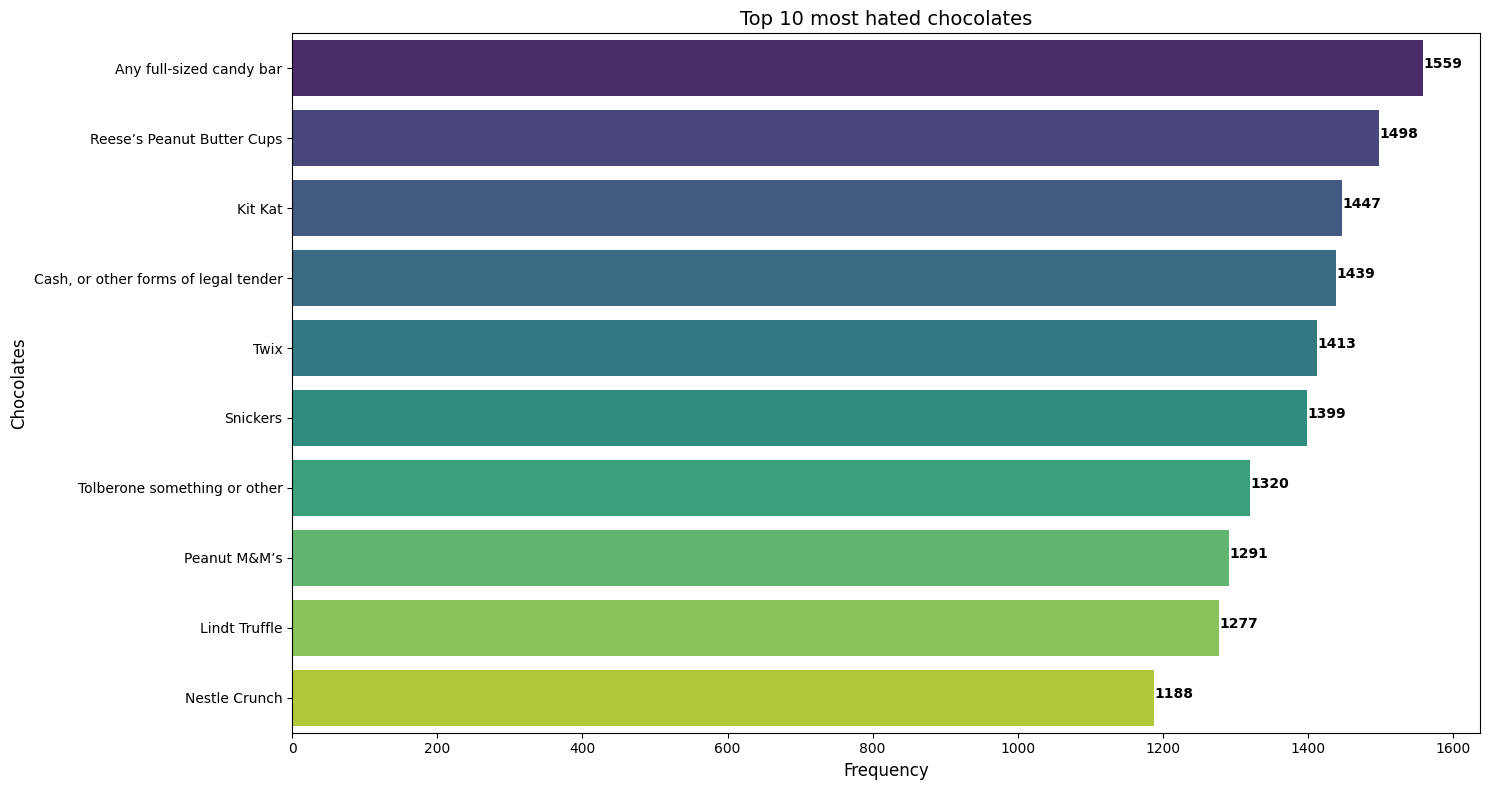

In [57]:
des_2 = des.iloc[[2, 3], 3:-2].T

print("These are the 10 most hated chocolates:")

top_despair = des_2.sort_values(by='freq', ascending=False)[des_2.sort_values(by='freq', ascending=False)['top'] == "JOY"].head(10)

plt.figure(figsize=(15, 8))

ax = sns.barplot(y=top_despair.index, x='freq', palette='viridis', data=top_despair)

for i, v in enumerate(top_despair['freq']):
    ax.text(v + 0.5, i, str(round(v, 2)), color='black', fontweight='bold')

plt.title("Top 10 most hated chocolates", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Chocolates", fontsize=12)

plt.tight_layout()

plt.show()

These are the 10 most hated chocolates:


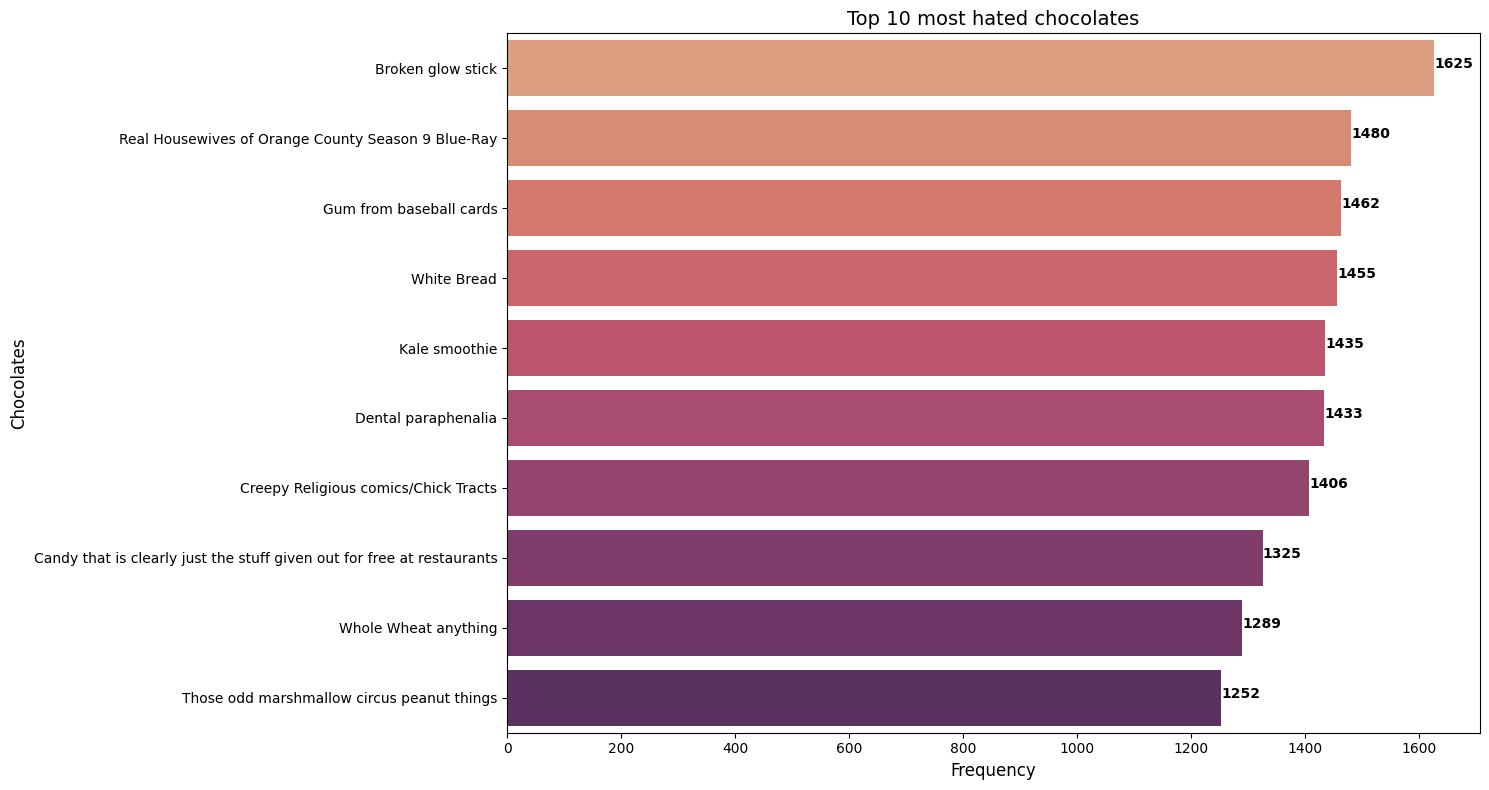

In [58]:
print("These are the 10 most hated chocolates:")

top_despair = des_2.sort_values(by='freq', ascending=False)[des_2.sort_values(by='freq', ascending=False)['top'] == "DESPAIR"].head(10)

plt.figure(figsize=(15, 8))

ax = sns.barplot(y=top_despair.index, x='freq', palette='flare', data=top_despair)

# Adjust text position and formatting for better visibility
for i, v in enumerate(top_despair['freq']):
    ax.text(v + 0.5, i, str(round(v, 2)), color='black', fontweight='bold')

plt.title("Top 10 most hated chocolates", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Chocolates", fontsize=12)

# Ensure plot adjusts to fit all content
plt.tight_layout()

plt.show()

#### So now we have a clean data and demostrated what are the most 10 hated and loved chocolates in the world.

### 14 - write a summary about all the cleaning steps 

- First, we dropped all the useless columns and columns with too much NaN.
- Then, we renamed columns for easeness.
- We cleaned the going_out column by replacing NaNs with the 'Maybe' word.
- We cleaned the gender column by replacing NaNs with the 'Didn't say' word.
- We cleaned the age column by replacing NaNs with the median of the ages.
- We cleaned the country column by replacing NaNs with the 'Other' word, and we used fuzzywuzzy to deal with the problem of different writing ways.
- We cleaned the area column by dropping it.
- We cleaned the Q6 columns by replacing NaNs with the 'Unknown' word.
- We cleaned the dress column by replacing NaNs with the 'Other' word.
- We cleaned the day column by replacing NaNs with the 'Other' word.
- Finally, we checked the data and made sure that there is no wrong data type, no NaN values, and all the columns are clean and ready for the next step EDA.
